In [4]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

In [2]:
with open("classes.json", "r", encoding="utf-8") as f:
    data = json.load(f)
classes_idx = data["1k_idx"]
classes_names = data["21k_idx"]
metrics = ["rbf_kernel", "laplacian_kernel", "w2_ot", "fd"]

## Distances

In [3]:
def model_class_plot(src_file, save_path, num_columns = 4, num_rows = 10):
    results = pd.read_csv(src_file)
    results['distance'] = results['distance'].astype(float)
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5 * num_rows))
    for i, class_name in enumerate(classes_idx):
        for j, metric in enumerate(metrics):
            subset = results[(results['class'] == int(class_name)) & (results['metric'] == metric)] 
            if subset.empty:
                print(f"Class{class_name}has no data under {metric}.")
                continue
            models = subset['model'].values
            distances = subset['distance'].values
            
            ax = axes[i][j]
            ax.bar(models, distances, color='skyblue')
            ax.set_xlabel('Model')
            ax.set_ylabel('Distance')
            ax.set_title(f'Class {class_name} - Metric {metric}')
            ax.set_xticks(range(len(models)))
            ax.set_xticklabels(models, rotation=45, ha='right')
    plt.tight_layout() 
    plt.savefig(save_path) 
    plt.close()
    

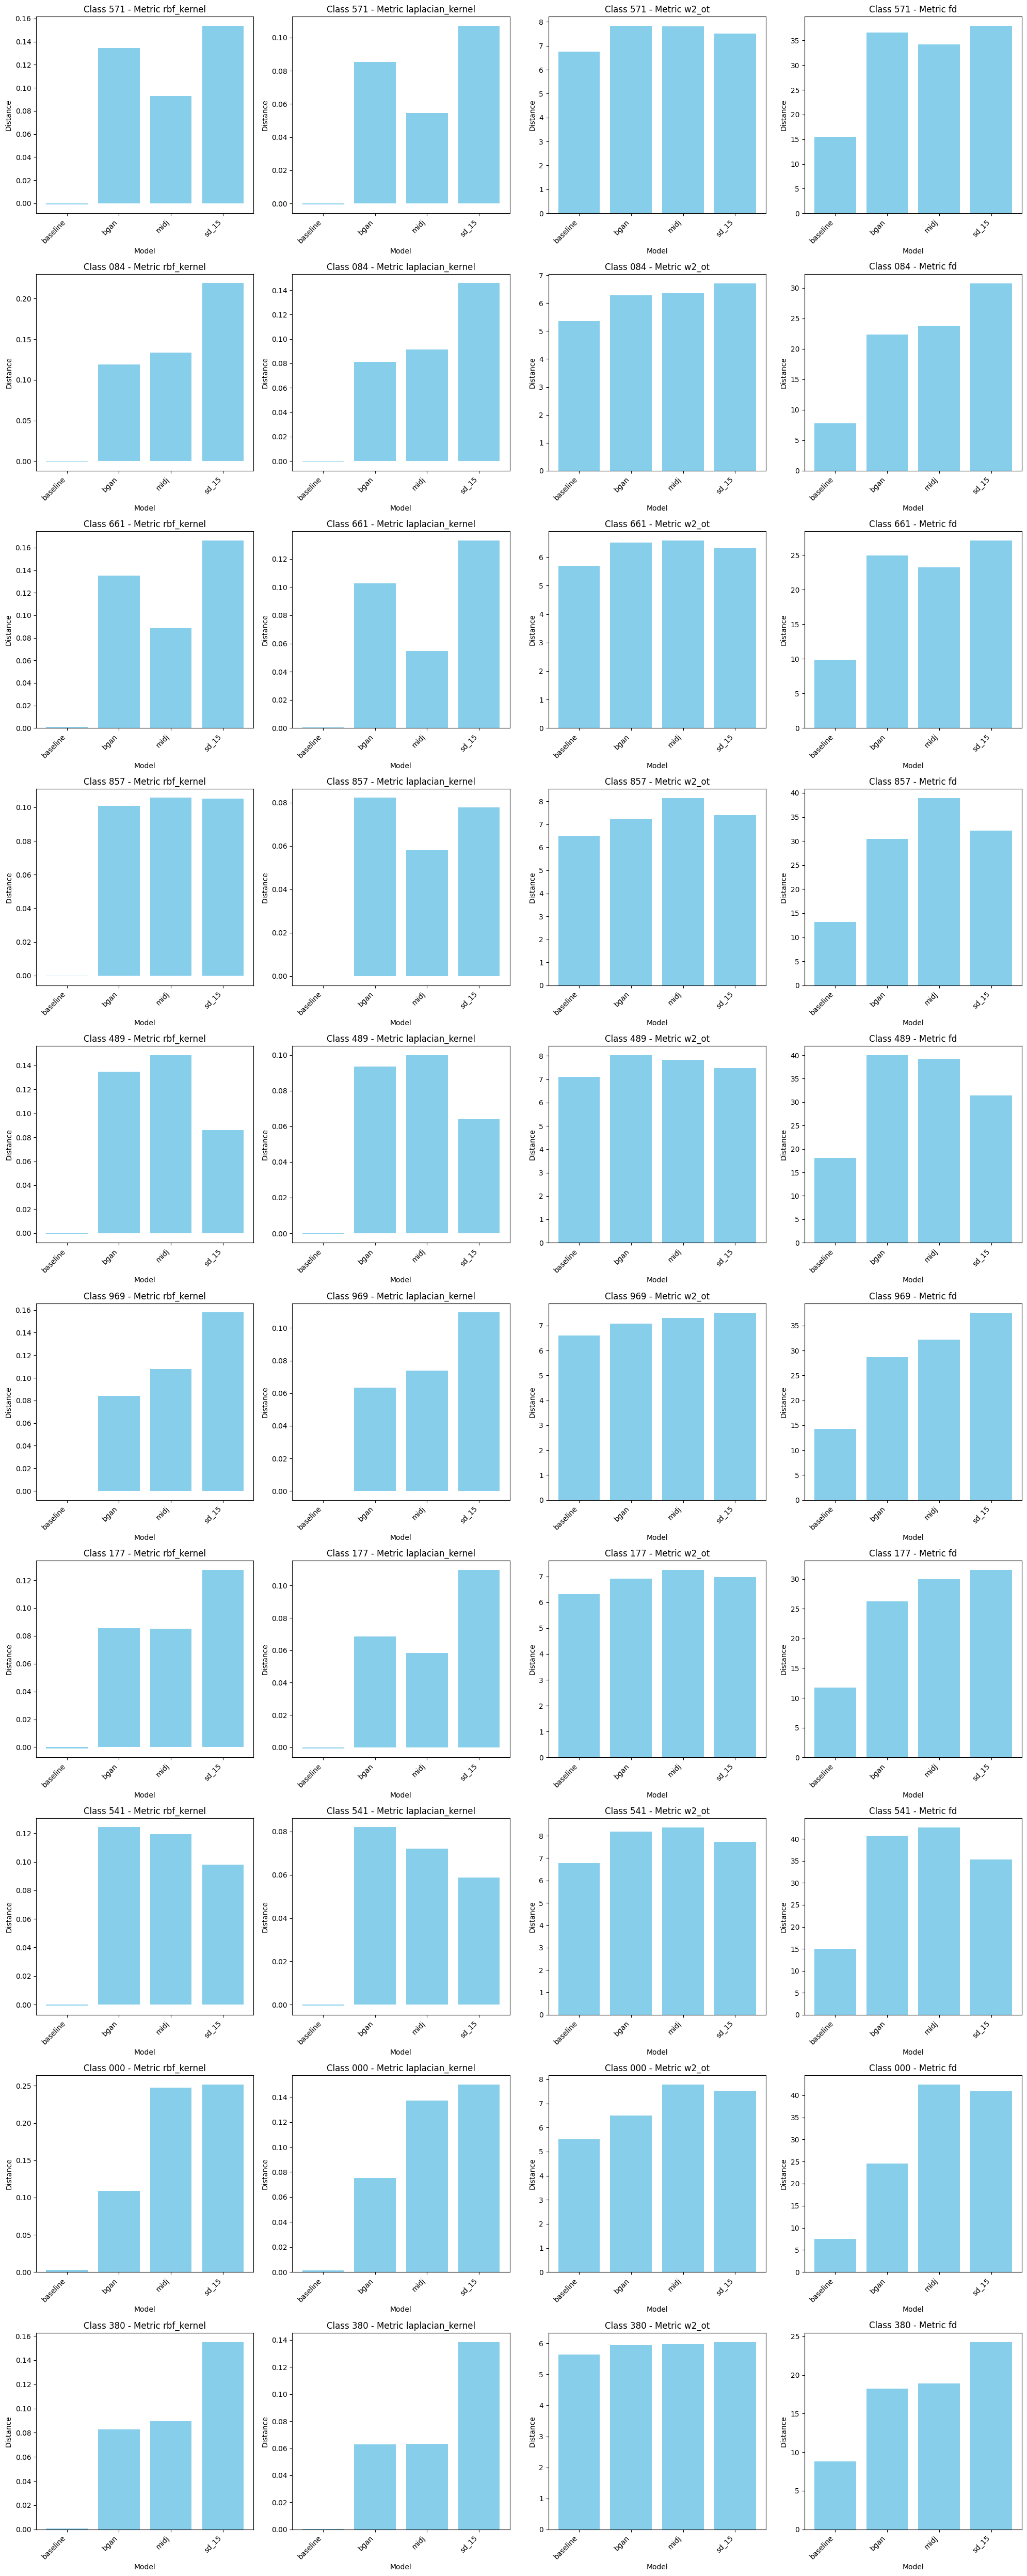

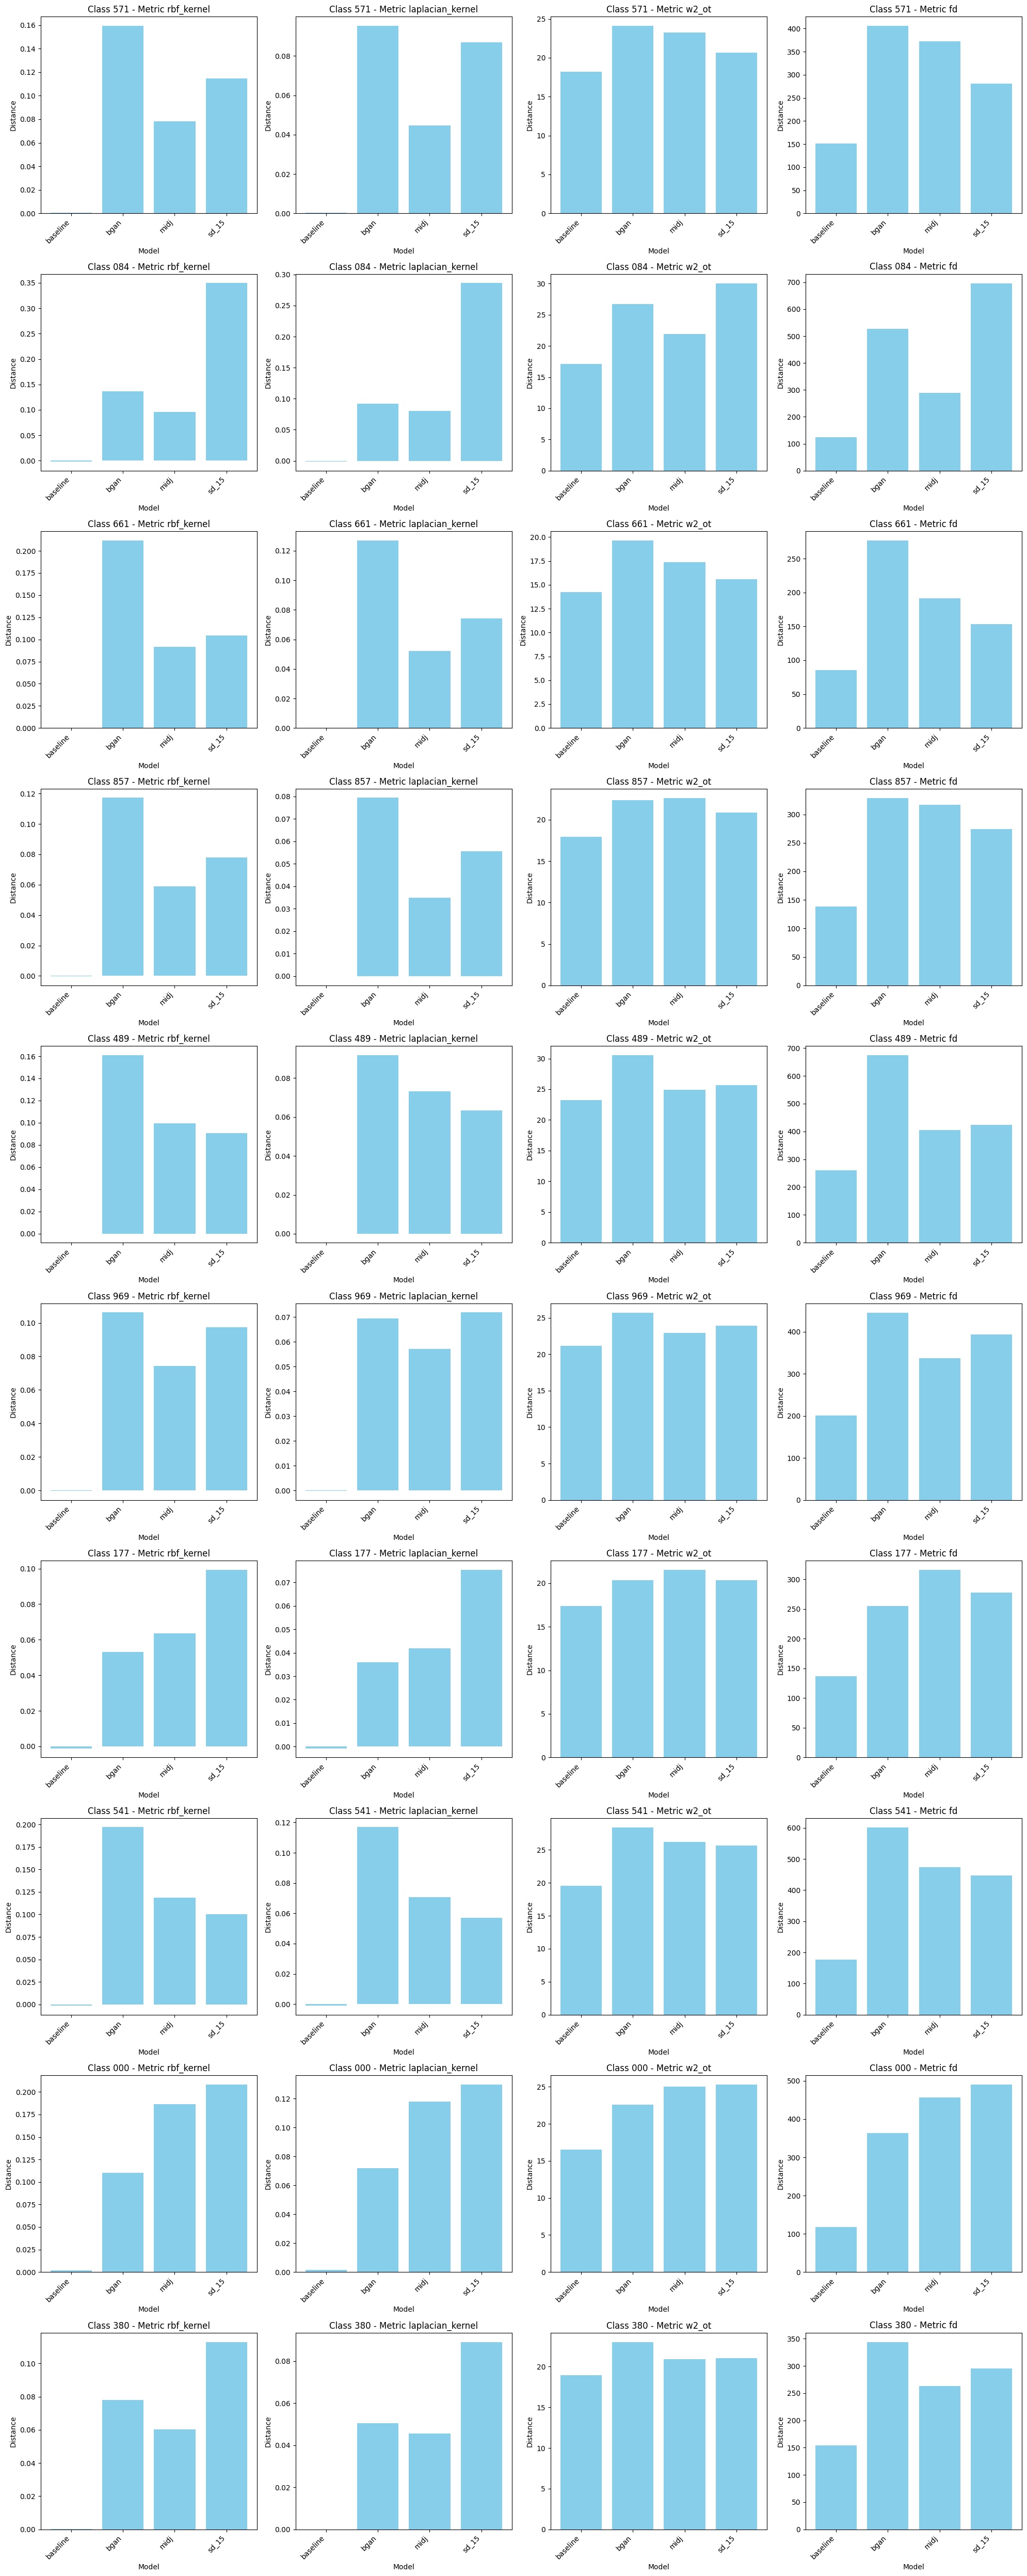

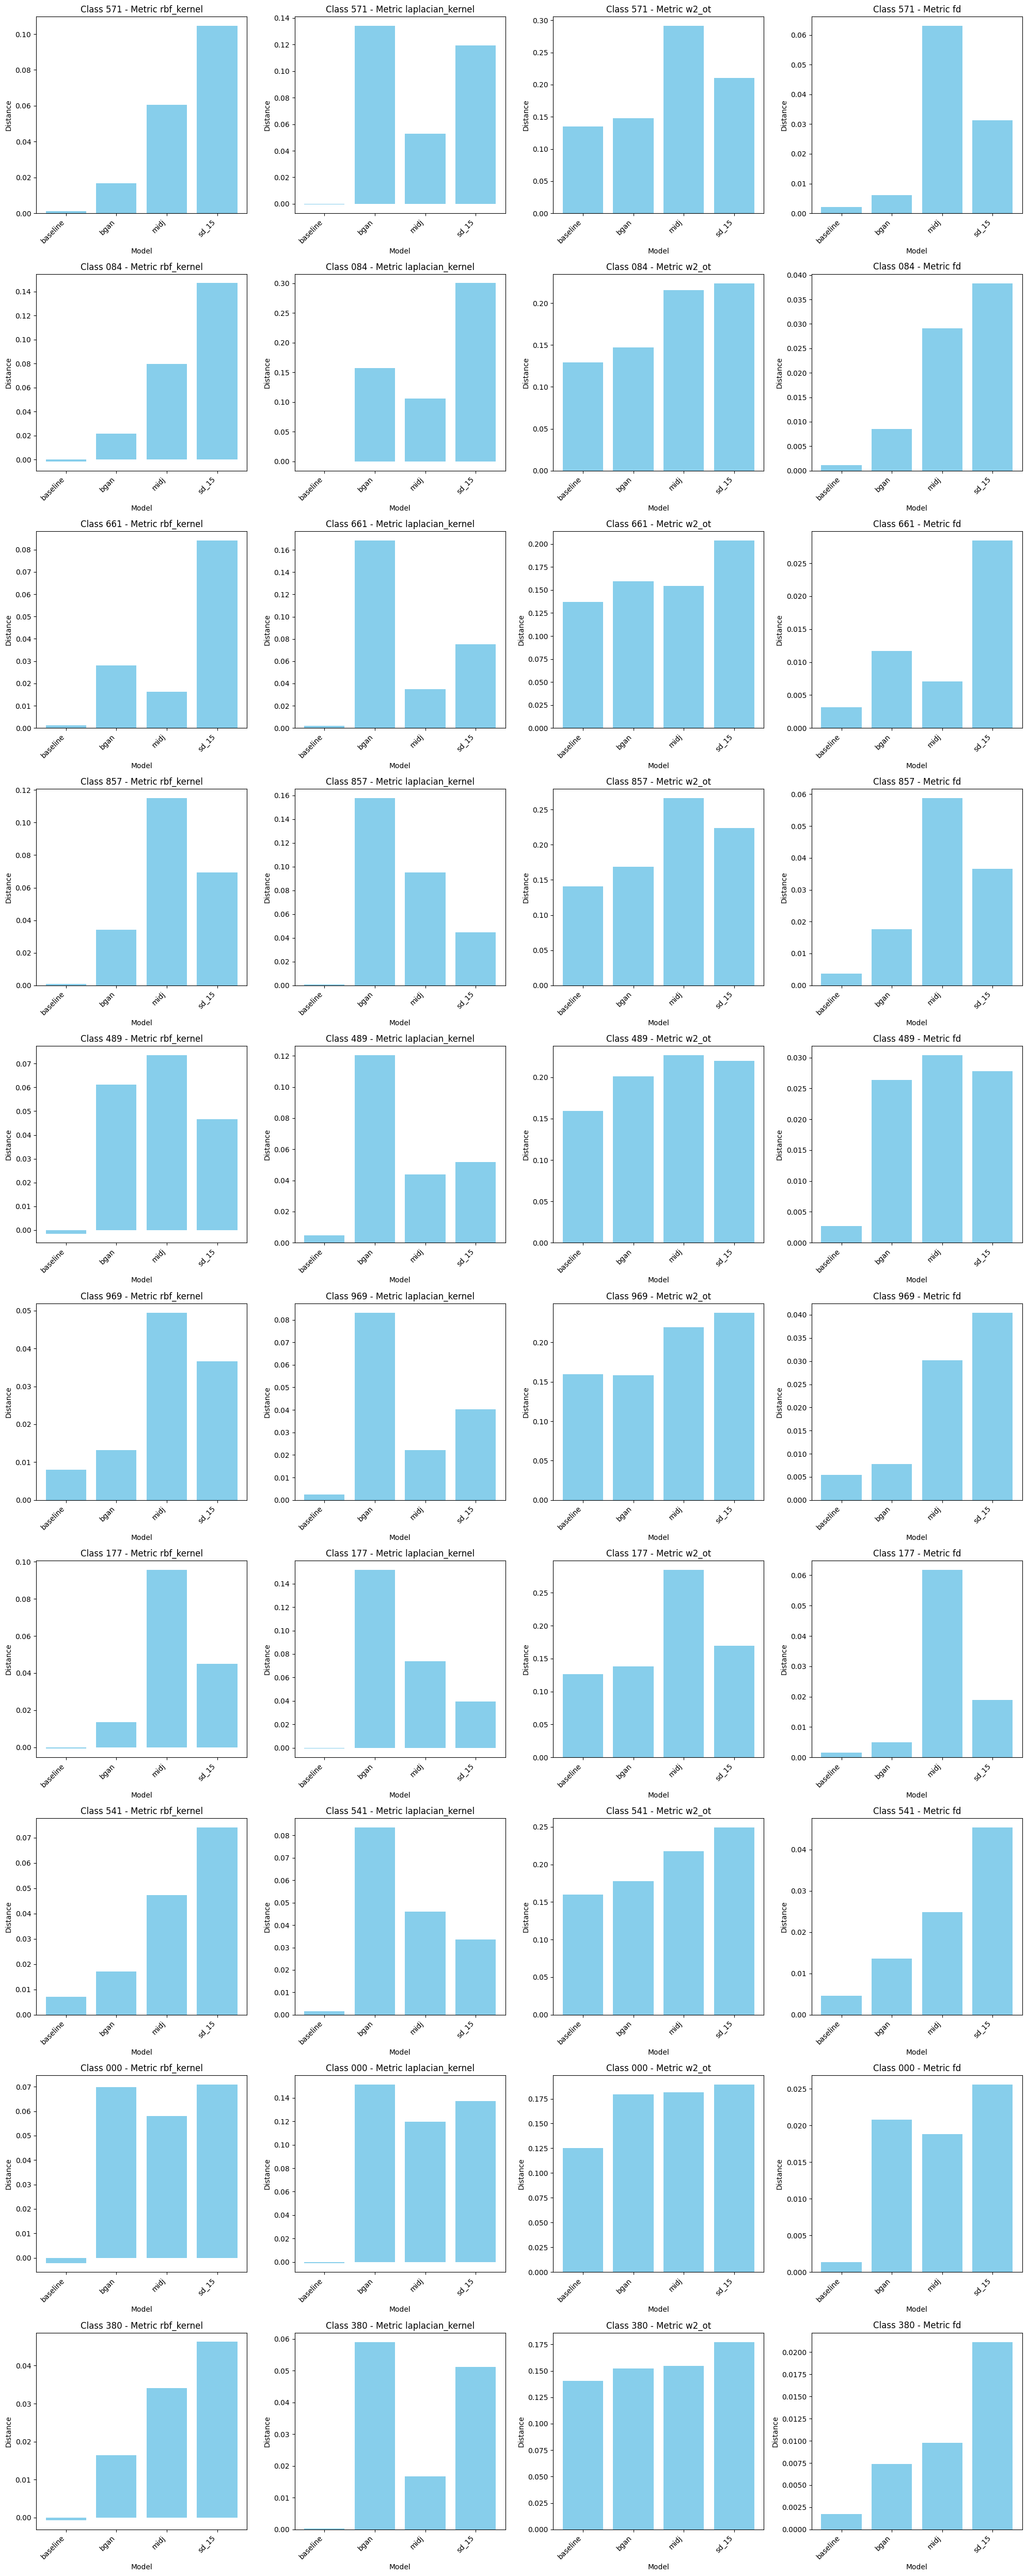

In [46]:
model_class_plot("results_clip.csv", "clip_details.png")
model_class_plot("results_dino.csv", "dino_details.png")
model_class_plot("results_wst.csv", "wst_details.png")

In [ ]:
def embedder_compare():
    for embedder in ["clip", "dino", "wst"]:
        results = pd.read_csv(f"results_{embedder}.csv")
        results['distance'] = results['distance'].astype(float)
        average_distances = results.groupby(['metric', 'model'])['distance'].mean().reset_index()

In [12]:
results_clip = pd.read_csv("results_clip.csv")
results_clip['distance'] = results_clip['distance'].astype(float)
average_distances = results_clip.groupby(['metric', 'model'])['distance'].mean().reset_index()
average_distances

,metric,model,distance
0,fd,baseline,12.179386
1,fd,bgan,29.260938
2,fd,midj,32.535353
3,fd,sd_15,32.877616
4,laplacian_kernel,baseline,-0.000021
5,laplacian_kernel,bgan,0.079708
6,laplacian_kernel,midj,0.076347
7,laplacian_kernel,sd_15,0.109432
8,rbf_kernel,baseline,-0.000019
9,rbf_kernel,bgan,0.111007


In [13]:
a = (((average_distances["distance"][1] + average_distances["distance"][2] + average_distances["distance"][3]) / 3) - average_distances["distance"][0]) / average_distances["distance"][0]
b = (average_distances["distance"][5] + average_distances["distance"][6] + average_distances["distance"][7]) / 3
c = (average_distances["distance"][9] + average_distances["distance"][10] + average_distances["distance"][11]) / 3
d = (((average_distances["distance"][13] + average_distances["distance"][14] + average_distances["distance"][15]) / 3) - average_distances["distance"][12]) / average_distances["distance"][12]

print(a,b,c,d)

1.5910969130537265 0.08849573334058121 0.1283245205879211 0.1520338463922313


In [ ]:
a = (((29.26 + 32.54 + 32.88 )/ 3) - 12.18) / 12.18
b = (0.08 +0.076 + 0.11) / 3
c = (0.111 + 0.122 + 0.152) / 3 
d = (((7.05 + 7.34 + 7.12) / 3) - 6.22) / 6.22
print(a,b,c)

In [14]:
results_dino = pd.read_csv("results_dino.csv")
results_dino['distance'] = results_dino['distance'].astype(float)
average_distances = results_dino.groupby(['metric', 'model'])['distance'].mean().reset_index()
average_distances

,metric,model,distance
0,fd,baseline,154.709906
1,fd,bgan,421.977960
2,fd,midj,341.892499
3,fd,sd_15,373.062579
4,laplacian_kernel,baseline,-0.000179
5,laplacian_kernel,bgan,0.083023
6,laplacian_kernel,midj,0.061853
7,laplacian_kernel,sd_15,0.098978
8,rbf_kernel,baseline,-0.000325
9,rbf_kernel,bgan,0.133060


In [15]:
a = (((average_distances["distance"][1] + average_distances["distance"][2] + average_distances["distance"][3]) / 3) - average_distances["distance"][0]) / average_distances["distance"][0]
b = (average_distances["distance"][5] + average_distances["distance"][6] + average_distances["distance"][7]) / 3
c = (average_distances["distance"][9] + average_distances["distance"][10] + average_distances["distance"][11]) / 3
d = (((average_distances["distance"][13] + average_distances["distance"][14] + average_distances["distance"][15]) / 3) - average_distances["distance"][12]) / average_distances["distance"][12]

print(a,b,c,d)

1.4496018983361432 0.08128471175829564 0.1204445938269297 0.2643483819812583


In [18]:
results_wst = pd.read_csv("results_wst.csv")
results_wst['distance'] = results_wst['distance'].astype(float)
average_distances = results_wst.groupby(['metric', 'model'])['distance'].mean().reset_index()
average_distances

,metric,model,distance
0,fd,baseline,0.002773
1,fd,bgan,0.012499
2,fd,midj,0.033371
3,fd,sd_15,0.031380
4,laplacian_kernel,baseline,0.000931
5,laplacian_kernel,bgan,0.126641
6,laplacian_kernel,midj,0.061042
7,laplacian_kernel,sd_15,0.089310
8,rbf_kernel,baseline,0.001105
9,rbf_kernel,bgan,0.029163


In [19]:
a = (((average_distances["distance"][1] + average_distances["distance"][2] + average_distances["distance"][3]) / 3) - average_distances["distance"][0]) / average_distances["distance"][0]
b = (average_distances["distance"][5] + average_distances["distance"][6] + average_distances["distance"][7]) / 3
c = (average_distances["distance"][9] + average_distances["distance"][10] + average_distances["distance"][11]) / 3
d = (((average_distances["distance"][13] + average_distances["distance"][14] + average_distances["distance"][15]) / 3) - average_distances["distance"][12]) / average_distances["distance"][12]

print(a,b,c,d)

8.285711470974787 0.09233094553152715 0.05486395160357153 0.40305806929707894


In [33]:
results_clip["metric"][0]

'rbf_kernel'

In [6]:
print(average_distances)

              metric     model   distance
0                 fd  baseline  12.179386
1                 fd      bgan  29.260938
2                 fd      midj  32.535353
3                 fd     sd_15  32.877616
4   laplacian_kernel  baseline  -0.000021
5   laplacian_kernel      bgan   0.079708
6   laplacian_kernel      midj   0.076347
7   laplacian_kernel     sd_15   0.109432
8         rbf_kernel  baseline  -0.000019
9         rbf_kernel      bgan   0.111007
10        rbf_kernel      midj   0.121948
11        rbf_kernel     sd_15   0.152019
12             w2_ot  baseline   6.223907
13             w2_ot      bgan   7.052370
14             w2_ot      midj   7.337691
15             w2_ot     sd_15   7.120395


In [37]:
fd_results_clip = pd.read_csv('fd_results_clip.csv')
fd_results_dino = pd.read_csv('fd_results_dino.csv')
mmd_results_clip = pd.read_csv('mmd_results_clip.csv')
mmd_results_dino = pd.read_csv('mmd_results_dino.csv')

In [38]:
fd_results_clip['frechet_distance'] = fd_results_clip['frechet_distance'].astype(float)
fd_results_dino['frechet_distance'] = fd_results_dino['frechet_distance'].astype(float)
mmd_results_clip['mmd²'] = mmd_results_clip['mmd²'].astype(float)
mmd_results_dino['mmd²'] = mmd_results_dino['mmd²'].astype(float)

In [46]:
fd_stats = fd_results_clip.groupby(['model']).agg(fd_mean = ('frechet_distance', 'mean')).reset_index()
fd_stats

,model,fd_mean
0,bgan,29.260013
1,midj,32.536739
2,sd_15,32.876446


In [47]:
fd_stats = fd_results_dino.groupby(['model']).agg(fd_mean = ('frechet_distance', 'mean')).reset_index()
fd_stats

,model,fd_mean
0,bgan,421.978764
1,midj,341.892391
2,sd_15,373.062087


In [39]:
mmd_results_clip = mmd_results_clip[mmd_results_clip['kernel'] == 'w2_ot']
w2d_stats = mmd_results_clip.groupby(['model']).agg(w2d_mean = ('mmd²', 'mean')).reset_index()

In [40]:
w2d_stats

,model,w2d_mean
0,bgan,7.052370
1,midj,7.337691
2,sd_15,7.120395


In [43]:
mmd_results_dino_1 = mmd_results_dino[mmd_results_dino['kernel'] == 'w2_ot']
w2d_stats = mmd_results_dino_1.groupby(['model']).agg(w2d_mean = ('mmd²', 'mean')).reset_index()

In [44]:
w2d_stats

,model,w2d_mean
0,bgan,24.322726
1,midj,22.662598
2,sd_15,22.908921


In [35]:
mmd_results_clip = mmd_results_clip[mmd_results_clip['kernel'] != 'w2_ot']

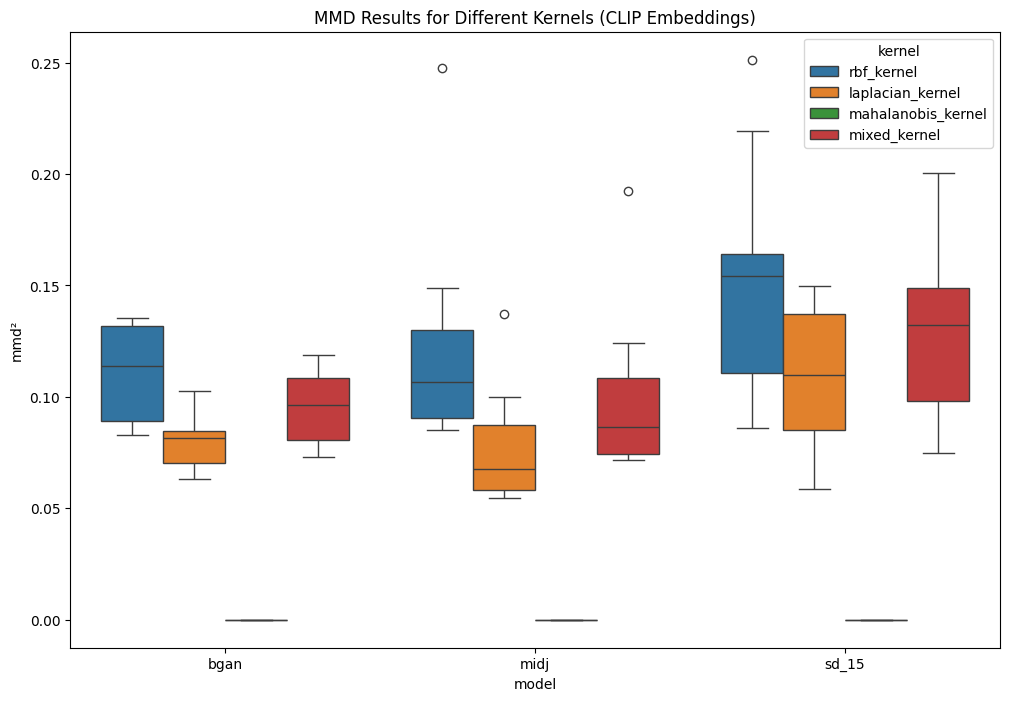

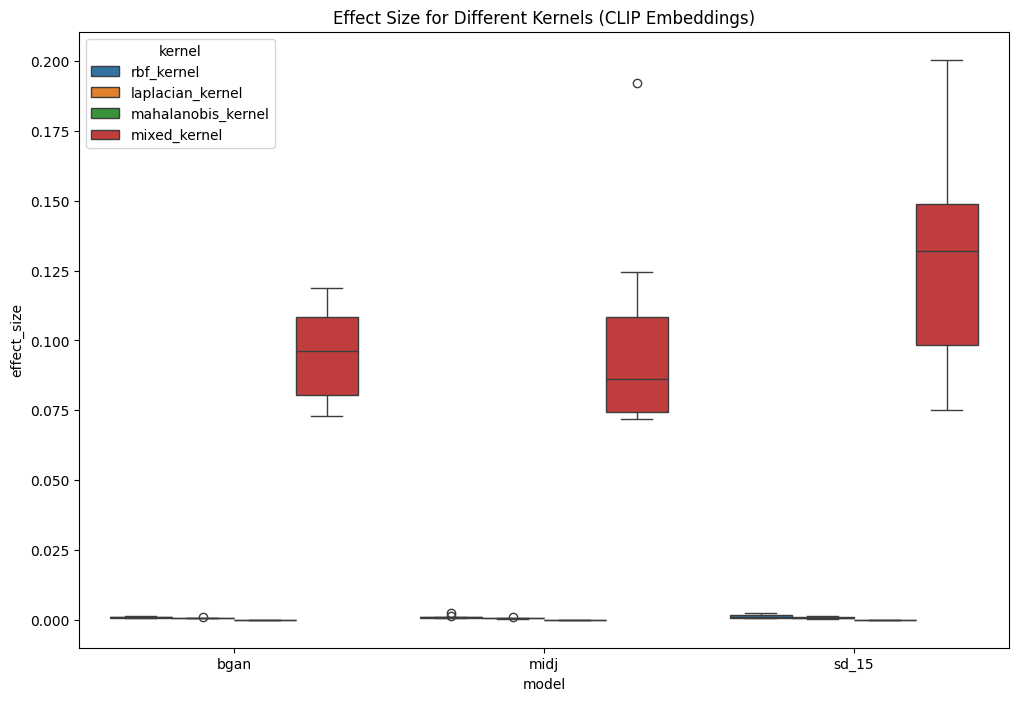

Best kernels for each model:
    model      kernel  mmd_mean  effect_size_mean
3    bgan  rbf_kernel  0.111007          0.000855
7    midj  rbf_kernel  0.121948          0.000957
11  sd_15  rbf_kernel  0.152019          0.001236
Best kernels for each model based on composite score:
    model        kernel  mmd_mean  effect_size_mean     score
2    bgan  mixed_kernel  0.095357          0.095357  0.095357
6    midj  mixed_kernel  0.099148          0.099148  0.099148
10  sd_15  mixed_kernel  0.130725          0.130725  0.130725


In [ ]:
# clip_stats = stats = mmd_results_clip.groupby(['model', 'kernel'])['mmd²', 'effect_size'].agg(['mean', 'std']).reset_index()
clip_stats = mmd_results_clip.groupby(['model', 'kernel']).agg(
    mmd_mean=('mmd²', 'mean'),
    mmd_std=('mmd²', 'std'),
    effect_size_mean=('effect_size', 'mean'),
    effect_size_std=('effect_size', 'std')
).reset_index()
# print(clip_stats)
plt.figure(figsize=(12, 8))
sns.boxplot(x='model', y='mmd²', hue='kernel', data=mmd_results_clip)
plt.title('MMD Results for Different Kernels (CLIP Embeddings)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='model', y='effect_size', hue='kernel', data=mmd_results_clip)
plt.title('Effect Size for Different Kernels (CLIP Embeddings)')
plt.show()

best_kernels = clip_stats.loc[clip_stats.groupby('model')['mmd_mean'].idxmax()]
print("Best kernels for each model:")
print(best_kernels[['model', 'kernel', 'mmd_mean', 'effect_size_mean']])

clip_stats['score'] = clip_stats['mmd_mean']*0.5 + 0.5 * clip_stats['effect_size_mean']

best_kernels = clip_stats.loc[clip_stats.groupby('model')['score'].idxmax()]
print("Best kernels for each model based on composite score:")
print(best_kernels[['model', 'kernel', 'mmd_mean', 'effect_size_mean', 'score']])

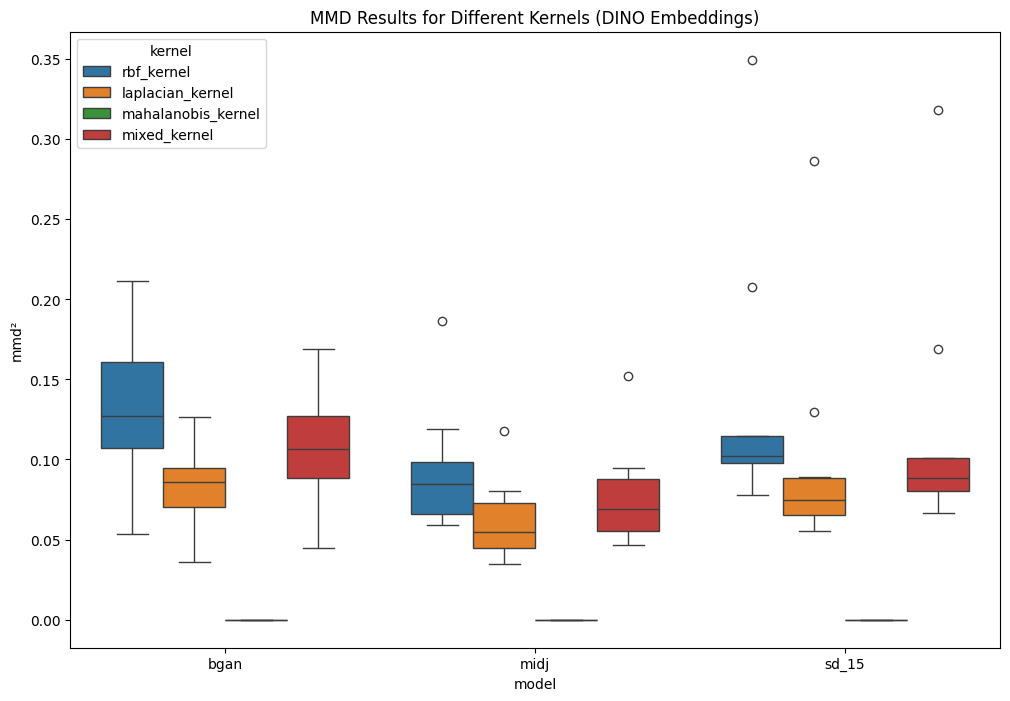

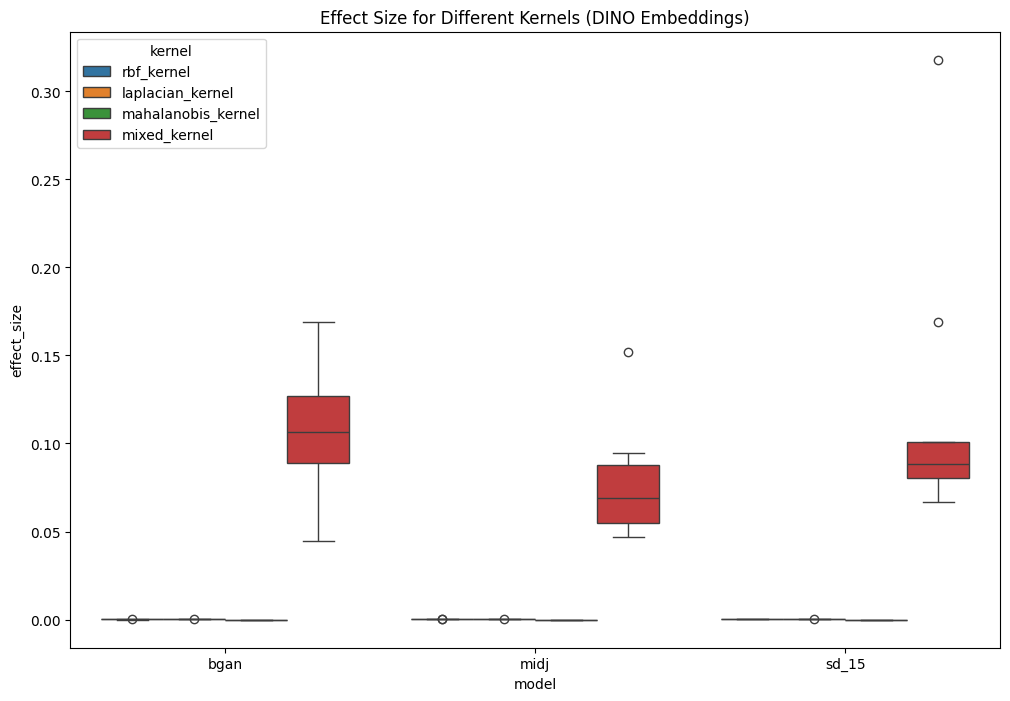

Best kernels for each model:
    model      kernel  mmd_mean  effect_size_mean
3    bgan  rbf_kernel  0.133060          0.000113
7    midj  rbf_kernel  0.092711          0.000075
11  sd_15  rbf_kernel  0.135563          0.000106
Best kernels for each model based on composite score:
    model        kernel  mmd_mean  effect_size_mean     score
2    bgan  mixed_kernel  0.108041          0.108041  0.108041
6    midj  mixed_kernel  0.077282          0.077282  0.077282
10  sd_15  mixed_kernel  0.117271          0.117271  0.117271


In [ ]:
mmd_results_dino_2 = mmd_results_dino[mmd_results_dino['kernel'] != 'w2_ot']
dino_stats = mmd_results_dino_2.groupby(['model', 'kernel']).agg(
    mmd_mean=('mmd²', 'mean'),
    mmd_std=('mmd²', 'std'),
    effect_size_mean=('effect_size', 'mean'),
    effect_size_std=('effect_size', 'std')
).reset_index()
# print(clip_stats)
plt.figure(figsize=(12, 8))
sns.boxplot(x='model', y='mmd²', hue='kernel', data=mmd_results_dino_2)
plt.title('MMD Results for Different Kernels (DINO Embeddings)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='model', y='effect_size', hue='kernel', data=mmd_results_dino_2)
plt.title('Effect Size for Different Kernels (DINO Embeddings)')
plt.show()

best_kernels = dino_stats.loc[dino_stats.groupby('model')['mmd_mean'].idxmax()]
print("Best kernels for each model:")
print(best_kernels[['model', 'kernel', 'mmd_mean', 'effect_size_mean']])

dino_stats['score'] = dino_stats['mmd_mean']*0.5 + 0.5 * dino_stats['effect_size_mean']

best_kernels = dino_stats.loc[dino_stats.groupby('model')['score'].idxmax()]
print("Best kernels for each model based on composite score:")
print(best_kernels[['model', 'kernel', 'mmd_mean', 'effect_size_mean', 'score']])

## PatchCore

In [2]:
generator_names = ["adm", "bgan", "glide", "midj", "sd_14", "sd_15", "vqdm", "wukong"]
with open("classes.json", "r", encoding="utf-8") as f:
    data = json.load(f)
classes_idx = data["1k_idx"]
classes_names = data["21k_idx"]

In [3]:
def mean_per_class(file):
    results = pd.read_csv(file)
    mean_per_class = results.groupby('CLASS',sort = False)['AUROC'].mean()
    mean_per_class.index = mean_per_class.index.astype(str).str.zfill(3)
    mean_df = mean_per_class.reset_index()
    mean_df.columns = ['CLASS', 'AUROC']
    return mean_df

def mean_all(file):
    results = pd.read_csv(file)
    return results["AUROC"].mean()

In [28]:
df = mean_per_class("padim_clip_result.csv")
df

,CLASS,AUROC
0,571,0.510199
1,084,0.626543
2,661,0.560801
3,857,0.569806
4,489,0.374905
5,969,0.329904
6,177,0.442069
7,541,0.555848
8,000,0.813113
9,380,0.357733


In [ ]:
def plot_class(embedder, method):
# embedder = ["clip", "dinov2", "wst"]
    num_classes = 10
    num_embedder = len(embedder)
    values = []
    for name in embedder:
        values.append(mean_per_class(f"{name}_{method}_result.csv")["AUROC"])

    bar_width = 0.25
    x = np.arange(num_classes)  

    plt.figure(figsize=(12, 6))

    for i in range(num_embedder):
        plt.bar(x + i * bar_width, values[i], width=bar_width, label=embedder[i])

    plt.xticks(x + bar_width, classes_idx)
    plt.xlabel("Class")
    plt.ylabel("Value")
    plt.title("Per-Class Values for Each Embedder")
    plt.legend()

    plt.tight_layout()
    plt.show()


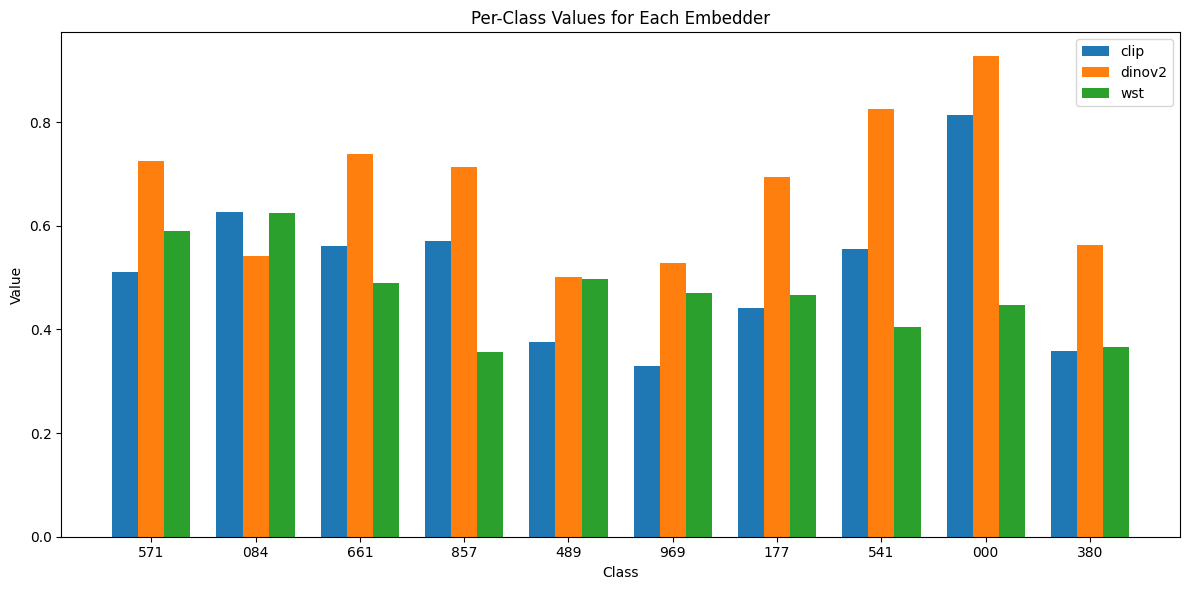

In [ ]:
plot_class(["clip", "dinov2", "wst"])

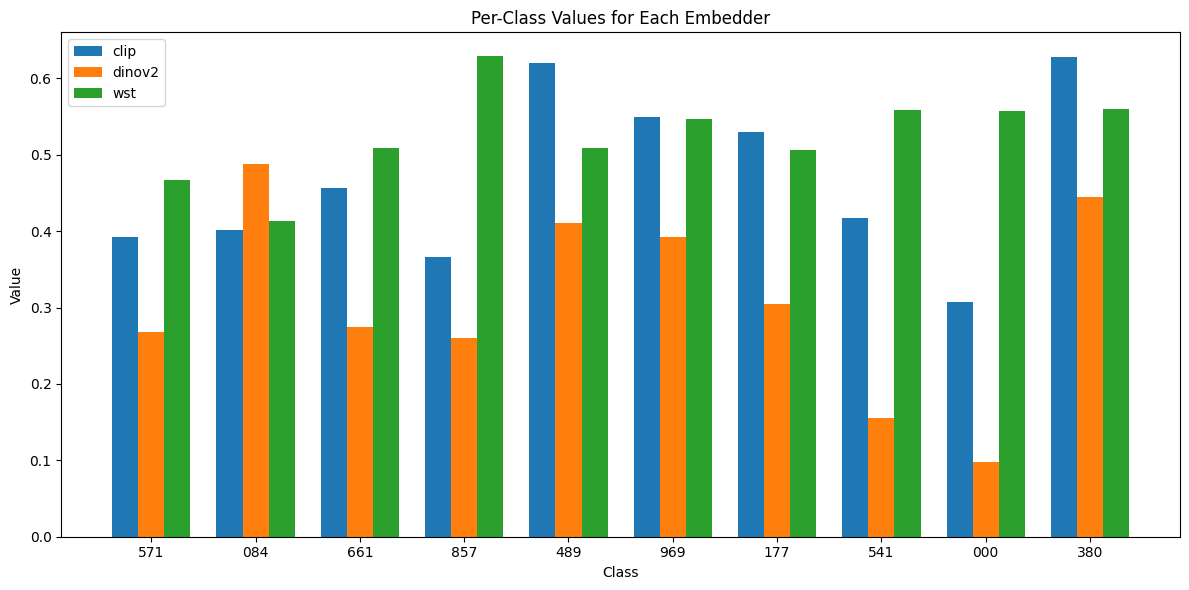

In [34]:
plot_class(["clip", "dinov2", "wst"], "core")

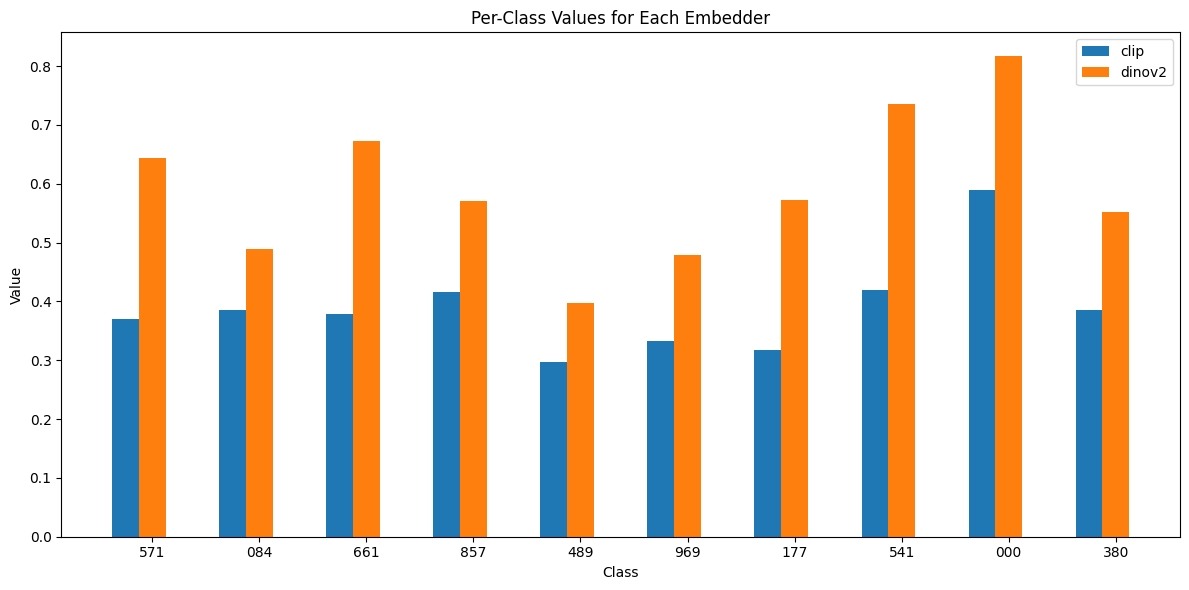

In [35]:
plot_class(["clip", "dinov2"], "patchcore")

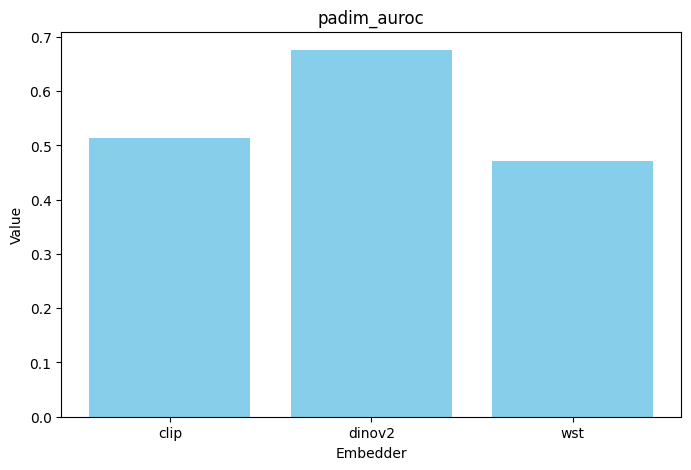

[np.float64(0.5140921099425901), np.float64(0.6757379464512525), np.float64(0.4712962962962963)]


In [ ]:
embedder = ["clip", "dinov2", "wst"]
padim_auroc = []
for name in embedder:
    padim_auroc.append(mean_all(f"padim_{name}_result.csv"))

plt.figure(figsize=(8, 5))
plt.bar(embedder, padim_auroc, color='skyblue')

plt.title("padim_auroc")
plt.xlabel("Embedder")
plt.ylabel("Value")

plt.show()

print(padim_auroc)

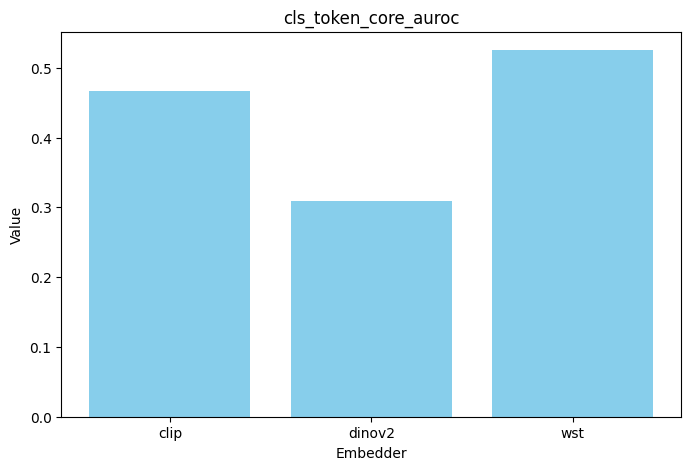

[np.float64(0.4666107808768988), np.float64(0.30954376873444084), np.float64(0.525452166844485)]


In [ ]:
embedder = ["clip", "dinov2", "wst"]
clstoken_auroc = []
for name in embedder:
    clstoken_auroc.append(mean_all(f"{name}_core_result.csv"))

plt.figure(figsize=(8, 5))
plt.bar(embedder, clstoken_auroc, color='skyblue')

plt.title("cls_token_core_auroc")
plt.xlabel("Embedder")
plt.ylabel("Value")

plt.show()
print(clstoken_auroc)

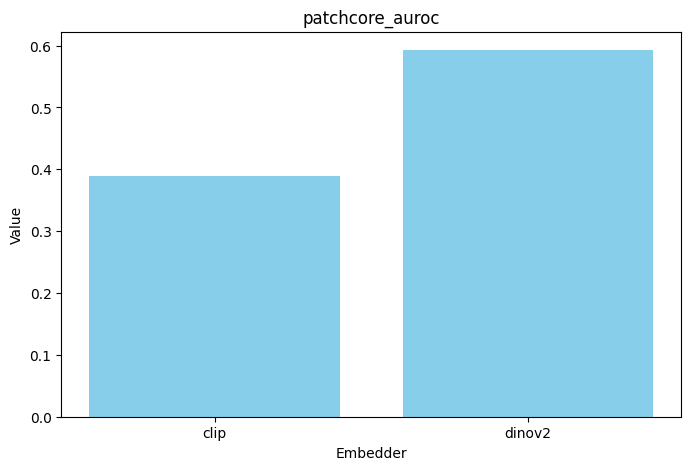

[np.float64(0.38894985520499925), np.float64(0.5927043641721281)]


In [ ]:
embedder = ["clip", "dinov2"]
patchcore_auroc = []
for name in embedder:
    patchcore_auroc.append(mean_all(f"{name}_patchcore_result.csv"))

plt.figure(figsize=(8, 5))
plt.bar(embedder, patchcore_auroc, color='skyblue')

plt.title("patchcore_auroc")
plt.xlabel("Embedder")
plt.ylabel("Value")

plt.show()
print(patchcore_auroc)

In [13]:
def mean_all(file):
    results = pd.read_csv(file)
    print("AUROC:", results["AUROC"].mean())
    print("AUPRC:", results["AUPRC"].mean())
    print("FPR95:", results["FPR95"].mean())
    # return results["AUROC"].mean()

In [15]:
embedder = ["clip", "dinov2", "wst"]
for name in embedder:
    mean_all(f"{name}_rpo2_result.csv")

AUROC: 0.5177729512777524
AUPRC: 0.5676631833058587
FPR95: 0.9370370370370369
AUROC: 0.6249847584209722
AUPRC: 0.6580157905309094
FPR95: 0.8524691358024692
AUROC: 0.4571622720113803
AUPRC: 0.5148643530686755
FPR95: 0.925514403292181
